<h2><center>----------------------------- Getting Started -----------------------------</center></h2>

In [1]:
import numpy as np
from matplotlib import pyplot
import copy

<h2><center>---------------------------- Read MNIST Data ----------------------------</center></h2>

In [2]:
import MNISTtools
#help(MNISTtools.load)
#help(MNISTtools.show)

<h1><center>1</center></h1>

### 1.1 Store the images and lables from the training datasets into 2 variables 

In [3]:
xtrain, ltrain = MNISTtools.load(dataset = "training", path = "/datasets/MNIST")

### 1.2 Shape, Size and Feature Dimension

In [4]:
print( "The shape of xtrain is: %s" %(xtrain.shape,) )
print( "The shape of ltrain is: %s" %(ltrain.shape,) )
print( "The size of training dataset is: %s" %ltrain.size )
print( "The feature dimension is: %s" %xtrain.shape[0] )

The shape of xtrain is: (784, 60000)
The shape of ltrain is: (60000,)
The size of training dataset is: 60000
The feature dimension is: 784


### 1.3 Conclusion

In [5]:
%%html
<style>
table {float: left}
</style>
<style> 
table td, table th, table tr {text-align:center !important;}
</style>

| Variable     |Property | Value      |
|:---|:---|:---|
|xtrain|shape|(784,60000)|
|ltrain|shape|(60000,)|
|training dataset|size|60000|
|training dataset|Feature dimension|784|


<h1><center>2</center></h1>

### 2.1 Display the image (index = 42) and check its label

The image with index 42:


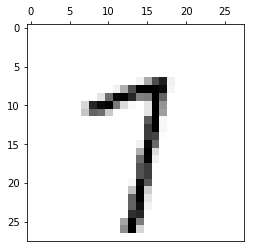

The label of image with index 42: 7


In [6]:
print("The image with index 42:")
MNISTtools.show(xtrain[:, 42])
print("The label of image with index 42: %s" %ltrain[42])

<h1><center>3</center></h1>

### 3.1 Range of xtrain

In [7]:
print("Range of xtrain is: [%s,%s]" %(np.min(xtrain),np.max(xtrain)))

Range of xtrain is: [0,255]


### 3.2 Type of xtrain

In [8]:
print("Type of xtrain is: %s" %type(xtrain))

Type of xtrain is: <class 'numpy.ndarray'>


<h1><center>4</center></h1>

### 4.1 Function Creation:

In [9]:
def normalize_MNIST_images(x):
    """
    :param x: a collection of images
    :type x: np.array int8
    :return: modified version of images [-1,1]
    :rtype: np.array float32
    """
    return ((x-127.5)/127.5).astype(np.float32)

### 4.1.1 check Output of Functin

In [10]:
xtrain = normalize_MNIST_images(xtrain)
print("Range of xtrain after normalization is: [%s,%s]" %(np.min(xtrain),np.max(xtrain)))

Range of xtrain after normalization is: [-1.0,1.0]


<h1><center>5</center></h1>

### 5.1 Complete label2onehot function

In [11]:
def label2onehot(lbl):
    """
    : param lbl: labels of images 
    : type lbl: np.array, shape(60000,)
    : return: one-hot codes 
    : rtype: np.array, shape(10,60000)
    """
    d = np.zeros((lbl.max() + 1, lbl.size)) # d.shape: (9+1,60000) = (10,60000)
    d[lbl, np.arange(0, lbl.size)] = 1
    return d

dtrain = label2onehot(ltrain)
print("One-hot code dtrain[:,42] is: %s and the label it predicts is: %s" %(dtrain[:,42],np.argwhere(dtrain[:,42]==1)[0][0]))


One-hot code dtrain[:,42] is: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] and the label it predicts is: 7


In [12]:
print("ltrain[42] is: %s" %ltrain[42])
print("dtrain[:,42] corresponds to ltrain[42]: %s" %(ltrain[42]==np.argwhere(dtrain[:,42]==1)[0][0]) )

ltrain[42] is: 7
dtrain[:,42] corresponds to ltrain[42]: True


### 5.2 Conclusion

In [13]:
%%html
<style>
table {float: left}
</style>
<style> 
table td, table th, table tr {text-align:center !important;}
</style>

| Variable|Value |
|---|---|
|dtrain[:,42]|[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]|
|ltrain[42]|7|
|dtrain corresponds to ltrain| Yes|

<h1><center>6</center></h1>

### 6.1 Complete onehot2label function

In [14]:
def onehot2label(d):
    """
    : param d: one-hot codes
    : type d: np.array, shape(10,n) - n: number of samples
    : return: corresponding labels of one-hot codes
    : rtype: np.array, shape(n,) - n: number of samples
    """
    lbl = d.argmax(axis=0)# return the index of max element for every column
    return lbl

### 6.2 check the function by ltrain == onehot2label(dtrain)

In [15]:
print("ltrain == onehot2label(dtrain): %s" %all(ltrain == onehot2label(dtrain)))

ltrain == onehot2label(dtrain): True


<h2><center>---------------------------- Activation Functions ----------------------------</center></h2>

<h2><center>7</center></h2>

### 7.1 softmax function computes $g(\alpha)_{i} = \frac{exp(\alpha_{i}-M)}{\sum_{j=1}^{10}exp(\alpha_{j}-M)}$ where $ M = \mathop{max}\limits_{j=1,...,10}(\alpha_{j})$

In [16]:
def softmax(a):
    """
    : compute softmax activation function
    : param a: vectors in R**10
    : type a: np.array, shape (10,60000) 
    : return: vectors with each element yi represents the probability in class i
    : type y: np.array, shape (10,60000)
    """
    return np.exp(a - a.max(axis = 0)) / (np.exp(a - a.max(axis = 0)).sum(axis = 0))

<h2><center> 8 </center></h2>

### 8.1 Proof of $\frac{ \partial g(\alpha)_{i}}{\partial \alpha_{i}} = g(\alpha)_{i}(1-g(\alpha)_{i})$ :


\begin{align}
{g(\alpha)_{i}} &= \frac {exp(\alpha_{i})} {\sum_{j=1}^{10} exp(\alpha_{j})} \\
{\frac{ \partial g(\alpha)_{i}}{\partial \alpha_{i}} }& = 
\frac{exp(\alpha_{i}) \times \sum_{j=1}^{10} exp(\alpha_{j}) - exp(\alpha_{i}) \times exp(\alpha_{j})|_{j=i} }
{(\sum_{j=1}^{10} exp(\alpha_{j}))^2} \\
&= \frac{exp(\alpha_{i})}{\sum_{j=1}^{10} exp(\alpha_{j})} - \frac{exp(\alpha_{i}^{2})}{(\sum_{j=1}^{10} exp(\alpha_{j}))^2} = g(a)_{i} - (g(a)_{i})^2 \\
&= g(\alpha)_{i}(1-g(\alpha)_{i}) \\
\end{align}




<h2><center>9</center></h2>

### 9.1 Proof of $\frac{ \partial g(\alpha)_{i}}{\partial \alpha_{j}} = - g(\alpha)_{i}g(\alpha)_{j}$ for $j \not= i$ :

\begin{align}
{
g(\alpha)_{i}
}& = \frac {exp(\alpha_{i})}{\sum_{j=1}^{10} exp(\alpha_{j})}\\
{
\frac{ \partial g(\alpha)_{i}}{\partial \alpha_{j}}
}& = - \frac{exp(\alpha_{i}) \times exp(\alpha_{j})}{(\sum_{j=1}^{10} exp(\alpha_{j}))^2} \\
& = - \frac{exp(\alpha_{i})}{\sum_{j=1}^{10} exp(\alpha_{j})} \times \frac{exp(\alpha_{j})}{\sum_{j=1}^{10} exp(\alpha_{j})} \\
&= - g(\alpha)_{i}g(\alpha)_{j} for j \not= i \\
\end{align}




<h2><center>10</center></h2>

### 10.1 softmaxp function computes $\delta = g(\alpha)\otimes e - <g(\alpha),e>g(\alpha)$

In [17]:
def softmaxp(a, e):
    """
    : compute delta for backprop algorithm
    : param a: output by output layers
    : type a: np.array, shape(10,60k)
    : param e: d(E), E: cross-entropy
    : type e: np.array, shape(10,60k)
    : return: delta
    : rtype: np.array, shape(10,60k)
    """
    g = softmax(a)
    product = (g * e).sum(axis = 0)
    return g * e - product * g

<h2><center>11</center></h2>

### 11.1 Check function softmaxp $\delta = \frac{\partial g(\alpha)}{\partial \alpha}\times e = \mathop{lim}\limits_{\epsilon \rightarrow 0}\frac{g(\alpha + \epsilon e) -g(\alpha)}{\epsilon}$

In [18]:
eps = 1e-6 # finite difference step: epsilon
a = np.random.randn(10, 200) # random inputs
e = np.random.randn(10, 200) # random directions
diff = softmaxp(a, e) # delta
diff_approx = (softmax(a + eps*e) - softmax(a)) / eps
rel_error = np.abs(diff - diff_approx).mean() / np.abs(diff_approx).mean()
print(rel_error, 'should be smaller than 1e-6')

4.985804833788473e-07 should be smaller than 1e-6


### 11.2 Five experiement records of real_error

|Time|Value|
|---|---|
|1st|5.28644217250807e-07|
|2nd|5.101713352304516e-07|
|3rd|4.885335947948998e-07|
|4th|4.853878161851958e-07|
|5th|4.860601104238716e-07|

<h2><center>12</center></h2>

### 12.1 ReLU$(\alpha)_{i} = max(\alpha_{i},0)$ and ReLUp

In [19]:
def relu(a):
    """
    : relu(a) = a if a>=0 else 0
    : param a: input of hidden layers
    : type a: np.array, shape(64,60k)
    : rtype: np.array, shape(64,60k)
    """
    return (a>0) * a 
def relup(a, e):
    """
    : relup(a,e) = a * e if a>=0 else 0
    : param a: delta 2
    : type a: 
    : type a: np.array, shape(64,60k)
    : return: delta 1
    : rtype: np.array, shape(64,60k) 
    """
    return (a>0) * e

<h2><center>---------------------------- Back Propogation ----------------------------</center></h2>

<h2><center>13</center></h2>

### 13.1 He and Xavier initializations

In [20]:
def init_shallow(Ni, Nh, No):
    """
    : param Ni: dimension of input layer = 784
    : type Ni: int
    : param Nh: number of hidden layer units = 64
    : type Nh: int
    : param No: number of output layer units = 10
    : type No: int
    : return: weights and biases
    : rtype: tuple(int)
    """
    b1 = np.random.randn(Nh, 1) / np.sqrt((Ni+1.)/2.)
    W1 = np.random.randn(Nh, Ni) / np.sqrt((Ni+1.)/2.)
    b2 = np.random.randn(No, 1) / np.sqrt((Nh+1.))
    W2 = np.random.randn(No, Nh) / np.sqrt((Nh+1.))
    return W1, b1, W2, b2

In [21]:
Ni = xtrain.shape[0] # 784
Nh = 64
No = dtrain.shape[0] # 10
netinit = init_shallow(Ni, Nh, No)
#saved_init_net = copy.deepcopy(netinit)

|Variable|$W_{1}$|$b_{1}$|$W_{2}$|$b_{2}$|
|---|---|---|---|---|
|Shape|(64, 784)|(64,1)|(10,64)|(10, 1)|

<h2><center>14</center></h2>

### 14.1 forwardprop_shallow function: evaluate the prediction of initial network

In [22]:
def forwardprop_shallow(x, net):
    """
    : implement forwardprop and return predictions 
    : input: x-> a1 = W1x+b1 -> hidden layer: h1 = relu(a1), a2 = W2h1+b2 -> output: y = softmax(a2)
    : return: predictions
    : rtype: np.array, shape (10,60000)
    """
    W1 = net[0]
    b1 = net[1]
    W2 = net[2]
    b2 = net[3]
    a1 = W1.dot(x) + b1 # input of hidden layer
    h1 = relu(a1) # output of hidden layer, activation function: ReLU
    a2 = W2.dot(h1) + b2 # input of output layer
    y = softmax(a2) # output, activation function: softmax
    return y


In [23]:
yinit = forwardprop_shallow(xtrain, netinit)

|Variable|$a_{1}$|$h_{1}$|$a_{2}$|$y$|
|---|---|---|---|---|
|Shape|(64, 60000)|(64, 60000)|(10, 60000)|(10, 60000)|

<h2><center>15</center></h2>

### 15.1 eval_loss function: $E = - \sum_{i=1}^{10}d_{i}logy_{i}$
#### Compute averge cross-entropy loss (averaged over both training samples and vector dimension)

In [24]:
def eval_loss(y,d):
    """
    : compute the average cross-entropy loss 
    : param y: predictions 
    : type y: np.array, shape (10,n) - n: number of samples
    : param d: one-hot codes
    : type d: np.array, shape (10,n) - n: number of samples
    """
    return - (d * np.log(y)).sum() / d.size

In [25]:
print(eval_loss(yinit, dtrain), 'should be around .26')

0.27009475571637825 should be around .26


|Cross-entropy H|Standard|Difference|
|---|---|---|
|0.2550986268633796|0.26|0.004901373136620424|

<h2><center>16</center></h2>

### 16.1 Function computes the percentage of misclassified samples between predictions and desired labels

In [26]:
def eval_perfs(y, lbl):
    """
    : compute the misclassification percentage of training 
    : param y: predictions
    : type y: np.array, shape(10,n) -n: number of samples
    : param lbl: desired labels
    : type lbl: np.array, shape(n,) -n: number of samples
    : return: percentage of misclassified samples
    : rtype: float
    """
    #print("Number of misclassified samples: %s" %len(np.argwhere(onehot2label(y) != lbl)))
    return np.sum(np.not_equal(np.argmax(y,axis=0),lbl))*1.0/lbl.size
    #return len(np.argwhere(onehot2label(y) != lbl))/lbl.shape[0]

In [27]:
print("Percentage of misclassified samples between y and lbl: %s" %eval_perfs(yinit,ltrain))

Percentage of misclassified samples between y and lbl: 0.9056666666666666


|Misclassified|Samples|
|---|---|
|Number|54045|
|Percentage|0.90075|

<h2><center>17</center></h2>

### Proof of $(\triangledown_{y}E)_{i} = - \frac{d_{i}}{y_{i}}$:

\begin{align}
{E} &= - \sum_{i=1}^{10}d_{i}logy_{i} \\
{(\triangledown_{y}E)_{i}} &= -d_{i}\triangledown_{y}(\sum_{i=1}^{10}logy_{i}) \\
&= - \frac{d_{i}}{y_{i}} \\
\end{align}

In [28]:
def update_shallow(x, d, net, gamma=.05):
    W1 = net[0] # network param initialization
    b1 = net[1]
    W2 = net[2]
    b2 = net[3]
    Ni = W1.shape[1] # feture dimension, hidden units, output neurons
    Nh = W1.shape[0]
    No = W2.shape[0]
    gamma = gamma / x.shape[1] # normalized by the training dataset size
    
    # 1. Forward Process
    a1 = W1.dot(x) + b1 # W1:(64, 784), b1:(64,1), a1:(64,1)
    h1 = relu(a1) # a1:(64, 60k), h1:(64,60k)
    a2 = W2.dot(h1) + b2 # W2:(10,64), b2:(10,1), a2:(10,60k)
    y = softmax(a2) # y:(10,60k)
    
    # 2. Compute Delta for Backprop
    d2 = softmaxp(a2, -d/y) # dE = -d/y, d2:(10,60k)
    d1 = relup(a1, W2.T.dot(d2)) # d1:(64,60k)
    
    # 3. Gradient Descent
    W2 -= gamma * d2.dot(h1.T) # gamma: learning rate
    W1 -= gamma * d1.dot(x.T)
    b2 -= gamma * d2.sum(axis=1).reshape(No,1) #(10,1)
    b1 -= gamma * d1.sum(axis=1).reshape(Nh,1) #(64,1)
    
    return W1, b1, W2, b2

<h2><center>18</center></h2>

In [29]:
def backprop_shallow(x, d, net, T, gamma=.05):
    """
    : param T: the iteration times
    : type T: int
    : return updated network and print the training loss and percentage of training errors for each iteration
    """
    lbl = onehot2label(d)
    if T < 50: 
        for t in range(T):
            net = update_shallow(x,d,net,gamma) # update net

            ypred = forwardprop_shallow(x,net)
            loss = eval_loss(ypred,d) # training loss
            train_err = eval_perfs(ypred,lbl)
            print("Iteration %s: loss= %s, training error rate: %s" %(t, loss, train_err))
    else: # do not report the loss and training errors every iteration if T is too large
        for t in range(T):
            net = update_shallow(x,d,net,gamma) # update net
            if t % 5 == 0 or t == T-1:
                ypred = forwardprop_shallow(x,net)
                loss = eval_loss(ypred,d) # training loss
                train_err = eval_perfs(ypred,lbl)
                print("Iteration %s: loss= %s, training error rate= %s" %(t, loss, train_err))
        
    return net

<h3><center>18.1: Performe Network Update with Different Numbers of T (Iteration Times)</center><h3>

### 18.1.1 T = 2

In [30]:
nettrain = backprop_shallow(xtrain, dtrain, netinit, T = 2)

Iteration 0: loss= 0.23362577870570622, training error rate: 0.8588666666666667
Iteration 1: loss= 0.22092386006196554, training error rate: 0.77365


### 18.1.2 T = 5

In [31]:
Ni = xtrain.shape[0] # Remember to initiate the net after one learning 
Nh = 64
No = dtrain.shape[0] # 10
netinit = init_shallow(Ni, Nh, No)
nettrain = backprop_shallow(xtrain, dtrain, netinit, T = 5)

Iteration 0: loss= 0.23213637190953895, training error rate: 0.8124166666666667
Iteration 1: loss= 0.2201284810041138, training error rate: 0.8227166666666667
Iteration 2: loss= 0.2115048430069544, training error rate: 0.7004833333333333
Iteration 3: loss= 0.2043467191552892, training error rate: 0.6803666666666667
Iteration 4: loss= 0.1976570604996038, training error rate: 0.6291


### 18.1.3 T = 20

In [40]:
Ni = xtrain.shape[0] # Remember to initiate the net after one learning 
Nh = 64
No = dtrain.shape[0] # 10
netinit = init_shallow(Ni, Nh, No)
nettrain = backprop_shallow(xtrain, dtrain, netinit, T = 20)

Iteration 0: loss= 0.22765905993787255, training error rate: 0.86175
Iteration 1: loss= 0.21672011432335864, training error rate: 0.7691833333333333
Iteration 2: loss= 0.20843756351587925, training error rate: 0.7136666666666667
Iteration 3: loss= 0.2011236476680443, training error rate: 0.6487
Iteration 4: loss= 0.19427061880926336, training error rate: 0.6048333333333333
Iteration 5: loss= 0.1876926321291342, training error rate: 0.5628166666666666
Iteration 6: loss= 0.181340796423651, training error rate: 0.5299166666666667
Iteration 7: loss= 0.17522895661886942, training error rate: 0.5000166666666667
Iteration 8: loss= 0.1693691545961573, training error rate: 0.4741666666666667
Iteration 9: loss= 0.1637719113915629, training error rate: 0.45155
Iteration 10: loss= 0.15845667474963937, training error rate: 0.4308166666666667
Iteration 11: loss= 0.15342266864908397, training error rate: 0.41235
Iteration 12: loss= 0.1486729644261387, training error rate: 0.3973
Iteration 13: loss= 0

### 18.1.4 T = 50

In [33]:
Ni = xtrain.shape[0] # Remember to initiate the net after one learning 
Nh = 64
No = dtrain.shape[0] # 10
netinit = init_shallow(Ni, Nh, No)
nettrain = backprop_shallow(xtrain, dtrain, netinit, T = 50)

Iteration 0: loss= 0.24367577282936234, training error rate= 0.8844166666666666
Iteration 5: loss= 0.18726948753518505, training error rate= 0.54495
Iteration 10: loss= 0.15506176135592672, training error rate= 0.40405
Iteration 15: loss= 0.1295561902892838, training error rate= 0.3235
Iteration 20: loss= 0.11134611374674619, training error rate= 0.27266666666666667
Iteration 25: loss= 0.09914059248802207, training error rate= 0.24451666666666666
Iteration 30: loss= 0.09618422658993153, training error rate= 0.2781166666666667
Iteration 35: loss= 0.08932679972300604, training error rate= 0.24893333333333334
Iteration 40: loss= 0.07707560884984281, training error rate= 0.20933333333333334
Iteration 45: loss= 0.0710303578506613, training error rate= 0.18128333333333332
Iteration 49: loss= 0.06716689387148511, training error rate= 0.1717


### 18.1.5 T = 100

In [34]:
Ni = xtrain.shape[0] # 784
Nh = 64
No = dtrain.shape[0] # 10
netinit = init_shallow(Ni, Nh, No)
nettrain = backprop_shallow(xtrain, dtrain, netinit, T=100)

Iteration 0: loss= 0.23664206164085744, training error rate= 0.8762833333333333
Iteration 5: loss= 0.19013780113928733, training error rate= 0.5958333333333333
Iteration 10: loss= 0.15969098308303314, training error rate= 0.41596666666666665
Iteration 15: loss= 0.14235385410771514, training error rate= 0.3989666666666667
Iteration 20: loss= 0.12071983712074824, training error rate= 0.32253333333333334
Iteration 25: loss= 0.10328655898543378, training error rate= 0.27403333333333335
Iteration 30: loss= 0.09179158068297094, training error rate= 0.2336
Iteration 35: loss= 0.08374088190646001, training error rate= 0.22261666666666666
Iteration 40: loss= 0.07652583295047381, training error rate= 0.19813333333333333
Iteration 45: loss= 0.07138363593555792, training error rate= 0.18871666666666667
Iteration 50: loss= 0.06688057942008423, training error rate= 0.17371666666666666
Iteration 55: loss= 0.06355846790293433, training error rate= 0.17003333333333334
Iteration 60: loss= 0.060618732527

### 18.1.6 Conclusion
|Itertation T|2|5|20|50|100
|---|---|---|---|---|---|
|Final Loss|0.2209|0.1977|0.1242|0.0672|0.0481|
|Final Training Error|0.7737|0.6291|0.3358|0.1717|0.1304|


#### The training loss and training errors both decrease as the iteration T inreases, although there is occasionally some fluctuation

<h2><center>19</center></h2>

### 19.1 Load test dataset 

In [35]:
xtest, ltest = MNISTtools.load(dataset = "testing", path = "/datasets/MNIST")
xtest = normalize_MNIST_images(xtest) 
dtest = label2onehot(ltest)

In [36]:
print( "The shape of xtest is: %s" %(xtest.shape,) )
print( "The shape of ltest is: %s" %(ltest.shape,) )
print( "The size of testing dataset is: %s" %ltest.size )

The shape of xtest is: (784, 10000)
The shape of ltest is: (10000,)
The size of testing dataset is: 10000


### 19.2 Evaluate the performance of network on the testing dataset

In [37]:
# use the trained net acquired instead of the initial one
ypred = forwardprop_shallow(xtest,nettrain)
test_loss = eval_loss(ypred,dtest)
test_err = eval_perfs(ypred,ltest)
print("Testing set: loss= %s, testing error rate: %s"%(test_loss,test_err))

Testing set: loss= 0.046197535002024254, testing error rate: 0.1222


### Evaluation

We can see that the testing loss and testing error rate are both lower than those of training with different numbers of iteration. Considering that the testing error rate has dropped below 0.13 to 0.1222, approximately to the level of 0.12, we can conclude that the network performs well on the testing dataset.

<h2><center>20</center></h2>

### 20.1 Implement the Backpropagation based on SGD/Minibatch Gradient Descent 

In [38]:
def backprop_minibatch_shallow(x, d, net, T, B=100, gamma=.05):
    """
    : x - training data; d - one-hot codes of training data; net - initial neural network; T - ecpoch; gamma - learning rate 
    : param B: mini batches / the size of random blocks
    : type B: int
    : return: trained neural network
    """
    N = x.shape[1] # sample number
    NB = int((N + B - 1)/B) # = N/B + 1 - 1/B 
    lbl = onehot2label(d)
    for t in range(0, T):
        shuffled_indices = np.random.permutation(range(N))
        
        # mini-batch learning with NB updates
        for l in range(NB):
            minibatch_indices = shuffled_indices[B*l : min(B*(l+1), N)] # the indices of training samples == the indices of columns
            net = update_shallow(x[:,minibatch_indices],d[:,minibatch_indices],net,gamma) # update net
        
        # report the loss and training error rates every epoch
        y = forwardprop_shallow(x, net)
        loss = eval_loss(y,d)
        train_err = eval_perfs(y,lbl)
        print("Epoch %s: loss= %s, training error rate= %s" %(t, loss, train_err))
    
    return net

Ni = xtrain.shape[0] # 784
Nh = 64
No = dtrain.shape[0] # 10
netinit = init_shallow(Ni, Nh, No)
netminibatch = backprop_minibatch_shallow(xtrain, dtrain, netinit, 5, B=100)

Epoch 0: loss= 0.0293734800233284, training error rate= 0.08416666666666667
Epoch 1: loss= 0.022940207279313635, training error rate= 0.06593333333333333
Epoch 2: loss= 0.019870220360254365, training error rate= 0.05558333333333333
Epoch 3: loss= 0.016840284834467454, training error rate= 0.04881666666666667
Epoch 4: loss= 0.014973666292027843, training error rate= 0.04318333333333333


<h2><center>21</center></h2>

### 21.1 Compare the performance of this new network on the testing dataset

In [39]:
ypred = forwardprop_shallow(xtest,netminibatch)
test_loss = eval_loss(ypred,dtest)
test_err = eval_perfs(ypred,ltest)
print("Minibatch Learning Testing set: loss= %s, testing error rate: %s"%(test_loss,test_err))

Minibatch Learning Testing set: loss= 0.01540219400400598, testing error rate: 0.0453


### 21.2 Conclusion

#### Not only is the Minibatch learning more efficient since its training procedure gets faster, but also it generates better results as the  loss and error rates are both lower in this case. Hence, based on the experiment results for this task, we generally reach a win-win by using Minibatch learning with fast training time and decent training performance.